# Homework Assignment  6

In [1]:
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
# Enable tqdm with pandas
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
# Lets train val test split and train a model, start with logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import lightgbm as lgb
from textblob import TextBlob
from afinn import Afinn
import matplotlib.pyplot as plt
import seaborn as sns

# # Have balanced classes in the train set
import imblearn 
from imblearn.under_sampling import RandomUnderSampler
tqdm.pandas()

**Question 1:** Construct a sentiment classifier using 80% of the reviews in the [Amazon Fine Food Reviews dataset](https://www.kaggle.com/snap/amazon-fine-food-reviews).
The classifier needs to predict if a product got a one-star or a five-star review.
Evaluate the classifier using the rest of the data (30pt).


In [8]:
df = pd.read_csv(r"/Users/adirserruya/Projects/BigDataMining/Lecture6/datasets/amazon_fine_food_reviews/Reviews.csv")

In [10]:
target_col = 'Score'
df = df[[target_col, 'Text']]
df = df.dropna()

In [ ]:

# Re-download punkt
nltk.download('punkt', force=True)

# Optional: Re-download all NLTK data
nltk.download('all', force=True)

# Download the stopwords for stopword removal
nltk.download('stopwords')

# Download the WordNet lemmatizer data
nltk.download('wordnet')

# (Optional) Download the omw-1.4 package for additional WordNet features
nltk.download('omw-1.4')

# Add your nltk_data directory explicitly
nltk.data.path.append('/Users/adirserruya/nltk_data')

# Verify the path
print(nltk.data.path)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adirserruya/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/adirserruya/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/adirserruya/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/adirserruya/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/adirserruya/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/adirser

['/Users/adirserruya/nltk_data', '/Users/adirserruya/Projects/BigDataMining/bigDataVenv/nltk_data', '/Users/adirserruya/Projects/BigDataMining/bigDataVenv/share/nltk_data', '/Users/adirserruya/Projects/BigDataMining/bigDataVenv/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data', '/Users/adirserruya/nltk_data', '/Users/adirserruya/nltk_data']


[nltk_data]    |   Unzipping corpora/ycoe.zip.
[nltk_data]    | 
[nltk_data]  Done downloading collection all
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adirserruya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adirserruya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/adirserruya/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [29]:
# Preprocessing Function
def preprocess_text(text: str) -> str:
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Join tokens back into string
    return ' '.join(tokens)

# Apply preprocessing to the 'Text' column
df['Cleaned_Text'] = df['Text'].progress_apply(preprocess_text)

100%|██████████| 568454/568454 [04:50<00:00, 1954.66it/s]


In [ ]:

tfidf_vectorizer = TfidfVectorizer(max_features=3000)
tfidf_features = tfidf_vectorizer.fit_transform(df['Cleaned_Text'])


In [ ]:

rus = RandomUnderSampler(random_state=42)


X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df[target_col], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)


logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_val)
print(classification_report(y_val, y_pred))

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

y_pred = lgb_model.predict(X_val)
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           1       0.52      0.65      0.58     12587
           2       0.25      0.44      0.32      7197
           3       0.28      0.42      0.34     10289
           4       0.30      0.44      0.36     19245
           5       0.90      0.67      0.77     87111

    accuracy                           0.60    136429
   macro avg       0.45      0.52      0.47    136429
weighted avg       0.70      0.60      0.64    136429

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.389616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 375630
[LightGBM] [Info] Number of data points in the train set: 83585, number of used features: 3000
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1

**Question 2:** Construct a sentiment classifier using features from the [TextBlob package](https://textblob.readthedocs.io/en/dev/index.html),
    and from the [affin package](https://pypi.org/project/afinn/). Compare the two classifiers results and visualize it (however you want) (20pt)

In [ ]:


df['TextBlob_Polarity'] = df['Cleaned_Text'].progress_apply(textblob_polarity)
# afin = Afinn()
# df['Afinn_Score'] = df['Text'].progress_apply(afin.score)

100%|██████████| 568454/568454 [01:48<00:00, 5215.46it/s]


In [49]:
afin = Afinn()
df['Afinn_Score'] = df['Cleaned_Text'].progress_apply(afin.score)

100%|██████████| 568454/568454 [09:06<00:00, 1040.43it/s]


In [ ]:
rus = RandomUnderSampler(random_state=42)


X_train, X_test, y_train, y_test = train_test_split(df[['TextBlob_Polarity','Afinn_Score']], df[target_col], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)


logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_val)
print(classification_report(y_val, y_pred))

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

y_pred = lgb_model.predict(X_val)
print(classification_report(y_val, y_pred))

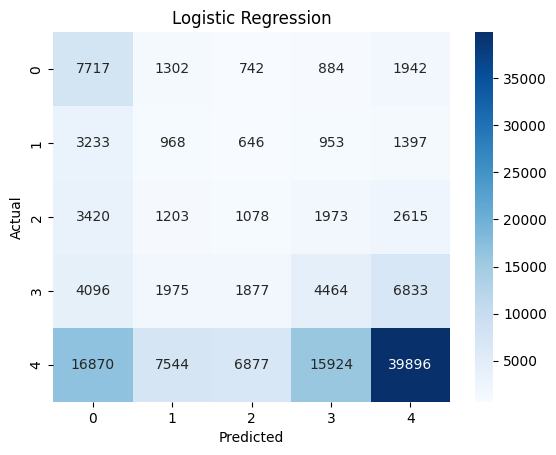

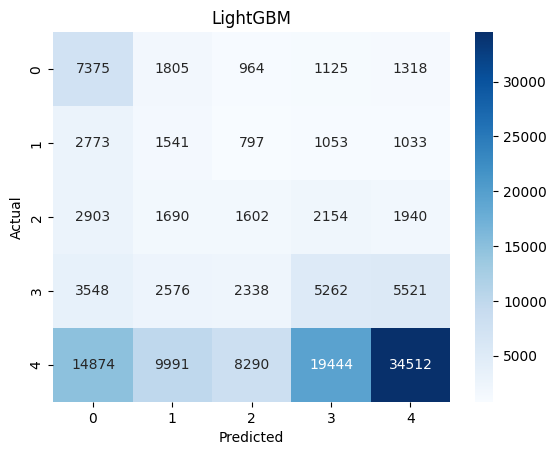

In [53]:
# Visualize Confusion Matrix for each model
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_val, logistic_model.predict(X_val), 'Logistic Regression')
plot_confusion_matrix(y_val, lgb_model.predict(X_val), 'LightGBM')

In [ ]:
# Visualize F1, Accuracy, Precision, Recall for each model for each model
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

def get_metrics(y_true, y_pred):
    return {
        'F1': f1_score(y_true, y_pred, average='weighted'),
        'Accuracy': accuracy_score(y_true, y_pred, normalize=True),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted')
    }

def visualize_metrics(y_true, y_pred, title):
    metrics = get_metrics(y_true, y_pred)
    sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
    plt.title(title)
    # Add text annotations
    for i, metric in enumerate(metrics.values()):
        plt.text(i, metric, f'{metric:.2f}', ha='center', va='bottom')
    plt.show()


visualize_metrics(y_val, logistic_model.predict(X_val), 'Logistic Regression')
visualize_metrics(y_val, lgb_model.predict(X_val), 'LightGBM')


**Question 3:**  Select a different reviews dataset and create a sentiment classifier which utilizes word embeddings (25pt).
Evaluate this classifier (5pt). Try to improve your classifier by adding additional features (20pt)

In [60]:
nltk.download('movie_reviews')


[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/adirserruya/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [2]:
# Load the movie reviews dataset
from nltk.corpus import movie_reviews
movie_reviews.categories()

df = pd.DataFrame({
    'Text': [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()],
    'Category': [movie_reviews.categories(fileid)[0] for fileid in movie_reviews.fileids()]
})


In [3]:
# Preprocessing Function
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word.isalpha() and word not in stop_words]

df['Processed_Text'] = df['Text'].progress_apply(preprocess_text)

100%|██████████| 2000/2000 [00:03<00:00, 609.23it/s]


In [4]:
import torch

# Function to load Word2Vec binary file
def load_word2vec_binary(file_path):
    word_vectors = {}
    with open(file_path, "rb") as f:
        # Read header
        header = f.readline().decode("utf-8").strip()
        vocab_size, vector_size = map(int, header.split())
        
        # Load word vectors
        for _ in range(vocab_size):
            # Read word
            word = b""
            while True:
                char = f.read(1)
                if char == b" ":
                    break
                word += char
            word = word.decode("utf-8")

            # Read vector
            vector = np.frombuffer(f.read(vector_size * 4), dtype=np.float32)

            # Add word and vector to the dictionary
            word_vectors[word] = torch.tensor(vector)

    return word_vectors, vector_size

# Load the Word2Vec model
file_path = "GoogleNews-vectors-negative300.bin"
word2vec, vector_size = load_word2vec_binary(file_path)



In [5]:
# Optimized embedding extraction function using NumPy
def extract_mean_embedding(processed_text, word2vec, embedding_dim):
    embeddings = np.array([word2vec[word] for word in processed_text if word in word2vec])
    if embeddings.size > 0:
        return embeddings.mean(axis=0)
    else:
        # Return a zero vector for empty/unknown words
        return np.zeros(embedding_dim)

# Compute embeddings for the entire DataFrame
embedding_dim = len(next(iter(word2vec.values())))  # Get the dimension of embeddings

df['Embeddings'] = df['Processed_Text'].progress_apply(
    lambda x: extract_mean_embedding(x, word2vec, embedding_dim)
)

100%|██████████| 2000/2000 [00:03<00:00, 506.79it/s]


In [7]:

X = np.stack(df['Embeddings'].values)
y = df['Category'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

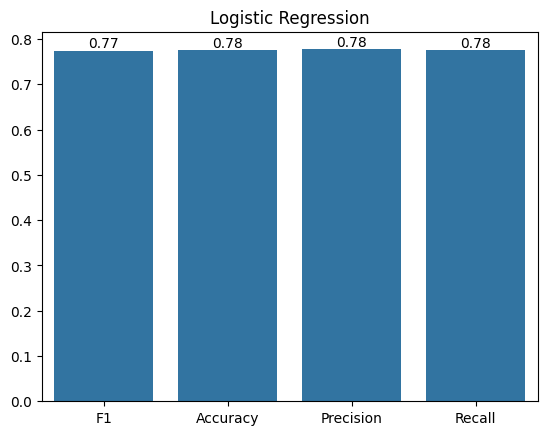

In [10]:


logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

visualize_metrics(y_test, y_pred, 'Logistic Regression')



[LightGBM] [Info] Number of positive: 799, number of negative: 801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 76500
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499375 -> initscore=-0.002500
[LightGBM] [Info] Start training from score -0.002500


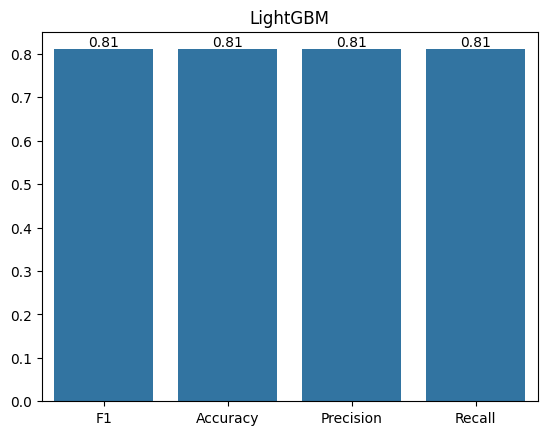

In [11]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)

visualize_metrics(y_test, y_pred, 'LightGBM')

### Imrovement

100%|██████████| 2000/2000 [00:01<00:00, 1358.96it/s]


[LightGBM] [Info] Number of positive: 799, number of negative: 801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 76755
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 301
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499375 -> initscore=-0.002500
[LightGBM] [Info] Start training from score -0.002500
Accuracy: 0.8275
Classification Report:
               precision    recall  f1-score   support

         neg       0.82      0.83      0.83       199
         pos       0.83      0.82      0.83       201

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



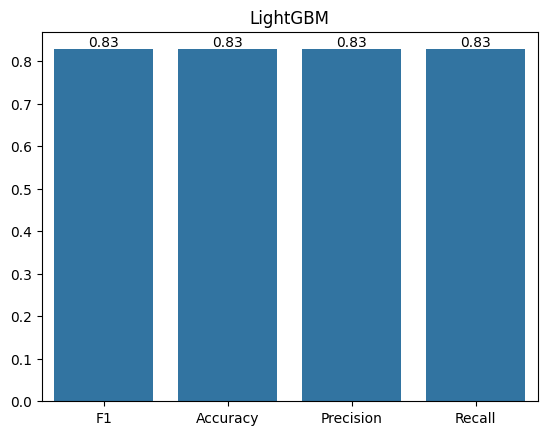

In [22]:
# Classifier improvement with extra features
import textblob
# Feature Extraction using TextBlob
def textblob_polarity(text):
    # If text is a list of words, join them into a single string
    if isinstance(text, list):
        text = ' '.join(text)
    return TextBlob(text).sentiment.polarity

df['TextBlob_Polarity'] = df['Processed_Text'].progress_apply(textblob_polarity)

# Ensure embeddings are numpy arrays and compatible
# Expand TextBlob_Polarity to match the embedding dimensions
def combine_features(embeddings, polarity):
    # Append the polarity score as an additional feature
    return np.append(embeddings, polarity)

# Combine features for all rows
df['Combined_Features'] = df.apply(
    lambda row: combine_features(row['Embeddings'], row['TextBlob_Polarity']),
    axis=1
)

# Prepare features and labels
X = np.stack(df['Combined_Features'].values)
y = df['Category'].values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train LightGBM Classifier
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = lgb_model.predict(X_test)

# Visualization (Assuming visualize_metrics is defined elsewhere)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
visualize_metrics(y_test, y_pred, 'LightGBM')